# Лабораторная работа №2
## по дисциплине *Моделирование инженерных задач*
#Работу выполнил: студент гр. **М1О-418Бки-19** *Мустафа Эльтаеб*

In [184]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.tree import plot_tree
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix,roc_curve, roc_auc_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler, LabelEncoder
DATA_URL="datasets/"

In [185]:
# winequality-white.csv is a ';' separated csv file.
white_wine=pd.read_csv(DATA_URL+"winequality-white.csv",sep=',')
red_wine = pd.read_csv(DATA_URL+"winequality-red.csv",sep=',')

In [186]:
red_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


In [187]:
white_wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


In [188]:
red_wine.shape


(1599, 12)

In [189]:
white_wine.shape

(4898, 12)

In [190]:
white_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [191]:
red_wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [192]:
# 'Type' is being added to both Red Wine & White Wine to group data in case there's a difference between the two types. 
df_red = red_wine
df_red['type']='Red'

In [193]:
df_red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5,Red


In [194]:
# 'Type' is being added to both Red Wine & White Wine to group data in case there's a difference between the two types. 
df_white = white_wine
df_white['type']='white'

In [195]:
df_white.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6,white
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6,white
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6,white
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6,white


In [196]:
# Combine both red & white wine
wine = pd.concat([df_red,df_white],ignore_index=True)

In [197]:
wine.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,Red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,Red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,Red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,Red


In [198]:
wine.info() # we would like to see if we have null values in the df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [199]:
wine.shape # 6497 rows and 13 columns

(6497, 13)

In [200]:
wine.isnull().sum() #for NaN

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

In [201]:
wine.duplicated().sum() # duplicates may point on the same wine, it can make our model unstable

1177

We have 1,177 duplicated rows, we can infer that it referrence to the same wine. Let's drop those rows for better results for our model.

In [202]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [203]:
wine = wine.drop_duplicates(subset=None, keep='first', inplace=False, ignore_index=False)

In [204]:
wine.shape # 5320 rows and 13 columns


(5320, 13)

At first, we had 6,497 rows. Now we have 5,320 rows.

In [205]:
count_cat = wine.nunique() # it shows us how much unique examples we have in each feature

In [206]:
count_cat

fixed acidity           106
volatile acidity        187
citric acid              89
residual sugar          316
chlorides               214
free sulfur dioxide     133
total sulfur dioxide    275
density                 998
pH                      108
sulphates               111
alcohol                 111
quality                   7
type                      2
dtype: int64

It let us understand how much "categories" we have for each column

In [207]:
wine["type"].value_counts() # it let us understand the number of the examples we have in the dataset

white    3961
Red      1359
Name: type, dtype: int64

In [208]:
# The distribution of the examples in our dataset
wine["type"].value_counts("white")*100 # in %
wine["type"].value_counts("red")*100 # in %

white    74.454887
Red      25.545113
Name: type, dtype: float64

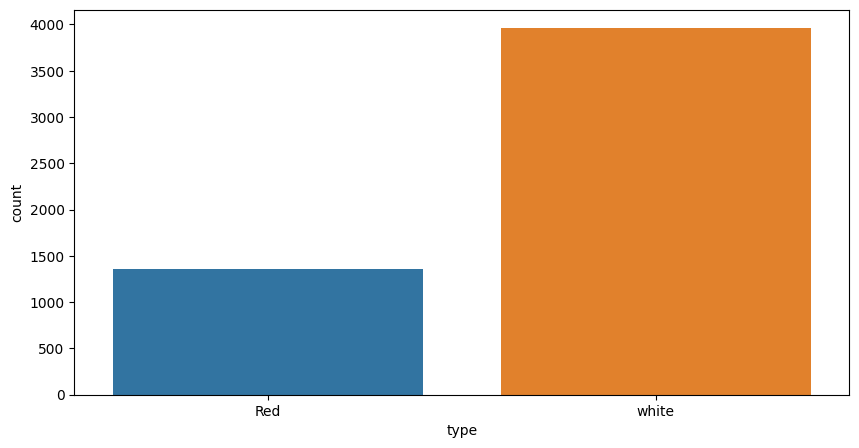

In [209]:
plt.figure(figsize = (10,5))
sns.countplot(x = wine['type']); # we will plot it for better illustration

It seems that we have much more white wine than red wine. It will be usefull for our dummy classifier.

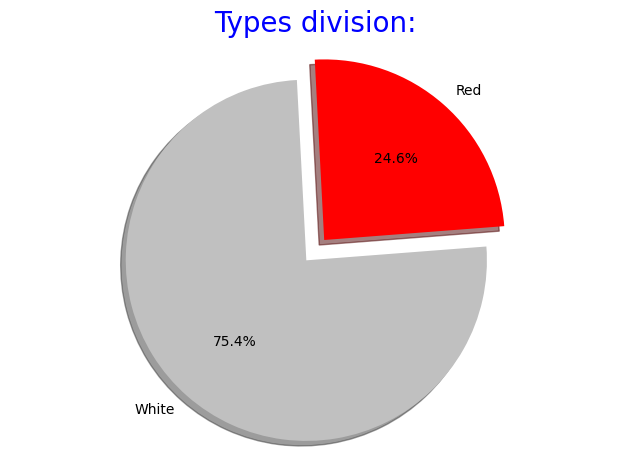

In [210]:
# Pie chart
labels = ['White', 'Red'] # every label represnts a type
pie_x = 0.753886 # the distribution
pie_y = 0.246114 # the distribution
sizes = [pie_x,pie_y] # we have two types and their distribution
explode = (0, 0.15) # the distance between the pic slicers
col_pie = ["silver","red"] # for the colors
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels,colors=col_pie, autopct='%1.1f%%',
        shadow=True, startangle=93)
# equal aspect ratio ensures that pie is drawn as a circle
plt.title("Types division:", size=20, color="blue")
ax1.axis('equal')  
plt.tight_layout()
plt.show()

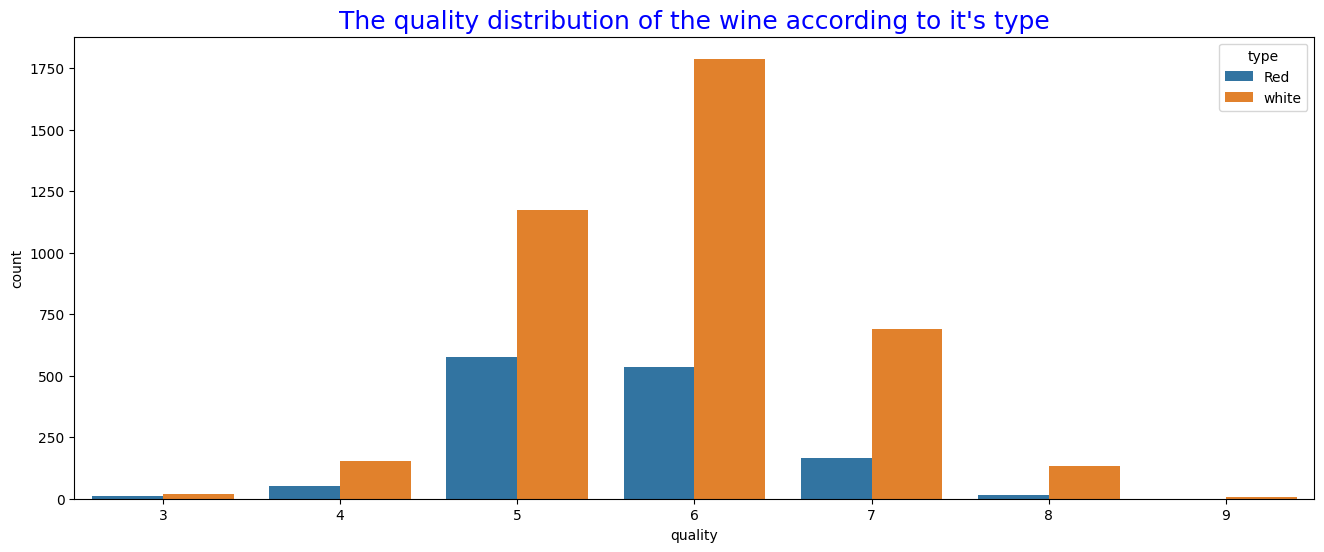

In [211]:
# another plot to show us more intersting details about the dataset
plt.figure(figsize = (16,6))
plt.title("The quality distribution of the wine according to it's type", size=18, color='b')
sns.countplot(x=wine['quality'], hue = wine['type']);

We can see that we have some quality for each wine. Let's take a look on it:

In [212]:
wine["quality"].value_counts() # the amount of wine we have from each quality number

6    2323
5    1752
7     856
4     206
8     148
3      30
9       5
Name: quality, dtype: int64

Let's try something else, we will groupby the wine into type groups to see which one has a greater quality:

In [213]:
df_types = wine.groupby('type') #by type
df_types

In [214]:
df_types.quality.mean() # the mean of the quality for each type

type
Red      5.623252
white    5.854835
Name: quality, dtype: float64

As we can see, the white wine that we have in the dataset, has a little bit better quality than the red wine.

In [215]:
encoder = LabelEncoder()
wine['type'] = encoder.fit_transform(wine['type'])
# red = 0
# white = 1

In [216]:
wine["type"].value_counts()

1    3961
0    1359
Name: type, dtype: int64

In [217]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,1


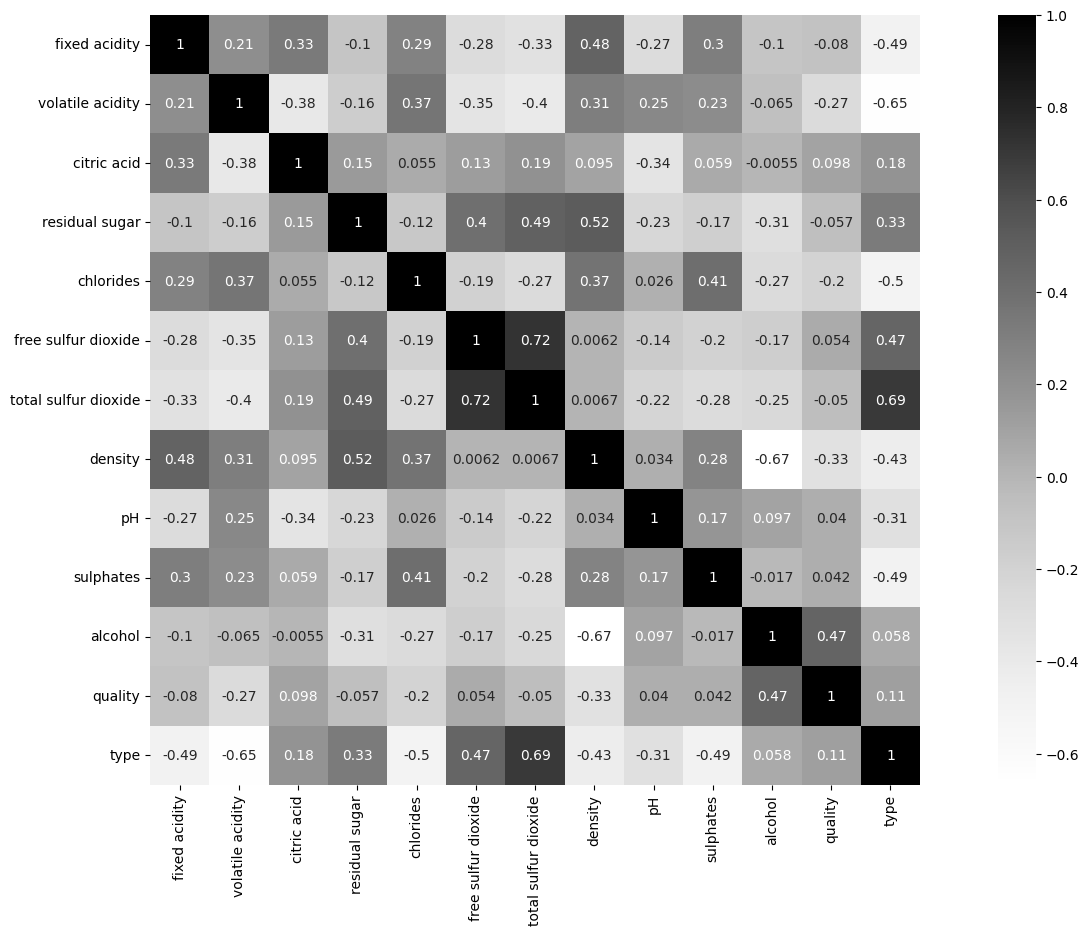

In [218]:
#I want to know the correalation between each feature
plt.figure(figsize=(20, 10))
sns.heatmap(wine.corr(), square=True, annot=True, cmap="Greys");

Heatmap is a super important tool, because it tells us the bigger story. As we can see, total sulfur dioxide has a huge effect on the type of the wine (0.7 of correalation). free sulfur dioxide takes the 2nd place with 0.47 of correalation. After it, the residual sugar with 0.35 of correalation. Another intersting thing is the fact that the quality of the wine has a connection to the type of the wine. It will be intresting to find out which one of the types has the higher quality.

We would like to see the impact of total sulfur dioxide, free sulfur dioxide and residual sugar on the wine's type. Let's go back to the graphs.

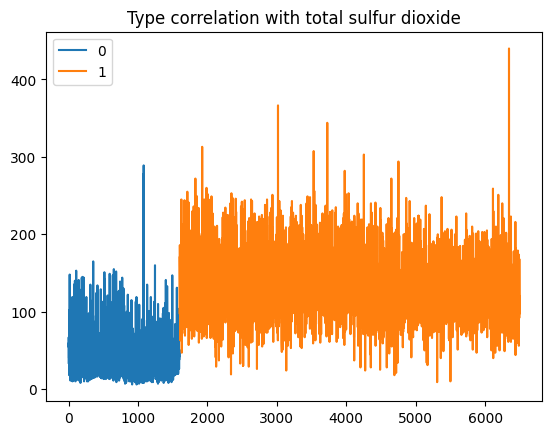

In [219]:
wine.groupby('type')['total sulfur dioxide'].plot(title="Type correlation with total sulfur dioxide", legend=True);
# the most important thing here is to watch the difference between the red and white wine
# we can also see that there are a few outliers 

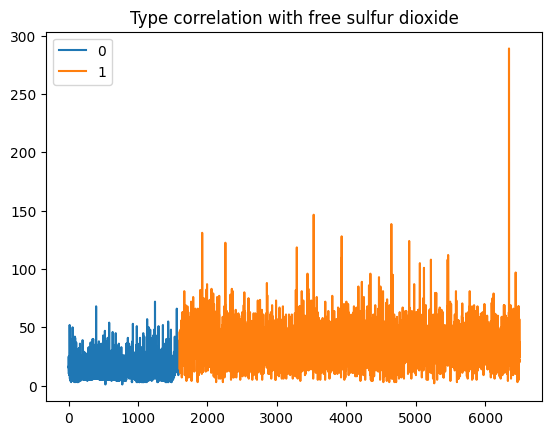

In [220]:
wine.groupby('type')['free sulfur dioxide'].plot(title="Type correlation with free sulfur dioxide", legend=True);

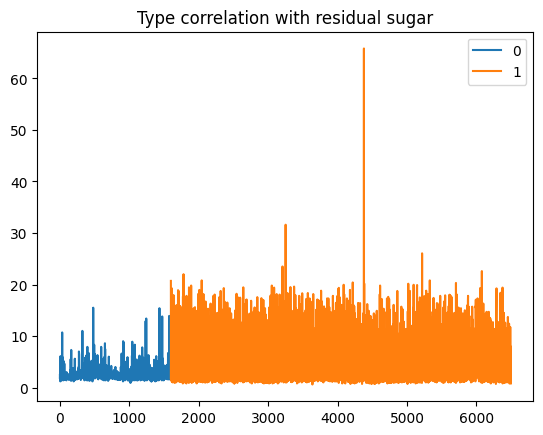

In [221]:
wine.groupby('type')['residual sugar'].plot(title="Type correlation with residual sugar", legend=True);

In [222]:
wine.describe() # more info about our dataset before the models part

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
count,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000,5320.000000
mean,7.215179,0.344130,0.318494,5.048477,0.056690,30.036842,114.109117,0.994535,3.224664,0.533357,10.549241,5.795677,0.744549
std,1.319671,0.168248,0.147157,4.500180,0.036863,17.804944,56.774163,0.002966,0.160379,0.149743,1.185933,0.879772,0.436155
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.240000,1.800000,0.038000,16.000000,74.000000,0.992200,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.300000,0.310000,2.700000,0.047000,28.000000,116.000000,0.994650,3.210000,0.510000,10.400000,6.000000,1.000000
75%,7.700000,0.410000,0.400000,7.500000,0.066000,41.000000,153.250000,0.996770,3.330000,0.600000,11.400000,6.000000,1.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


### Scaling

In [223]:
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']
ss = StandardScaler()
df = wine
df[features] = ss.fit_transform(df[features])
df.head(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,0.140064,2.115349,-2.164515,-0.699699,0.523880,-1.069289,-1.411146,1.100996,1.779304,0.177941,-0.969152,-0.904497,0
1,0.443199,3.185297,-2.164515,-0.544135,1.120736,-0.282917,-0.829841,0.763753,-0.153797,0.979389,-0.631833,-0.904497,0
2,0.443199,2.471998,-1.892672,-0.610806,0.957957,-0.844611,-1.058840,0.831202,0.220351,0.779027,-0.631833,-0.904497,0


In [224]:
#df['type']=df['type'].map({'red':0,'white':1})
#df

### Split Test/ Train

In [225]:
target=df['type'] # the feature we would like to predict, the type of the wine
data=df.drop(['type'], axis = 1) # we will drop y from x, because we want to predict it
X_train,X_test,y_train,y_test = train_test_split(data,target,random_state=0) #train\test split

The default split is 75% train , 25% test.

In [226]:
X_train.shape # 3990 rows, 12 columns

(3990, 12)

In [227]:
X_test.shape # 1330 rows, 12 columns

(1330, 12)

In [228]:
y_train.shape # 3990 rows, one column

(3990,)

In [229]:
y_test.shape # 1330 rows, one columns

(1330,)

# Comments
As the data has been processed, we will proceed with Model Deployment. Different methods will be tested to finalize the best fit modal for the Wine Quality prediction. The following tests will be applied:

Dummy Classifer       
KNN                  
Decision Tree         
Logistic Regression


# Dummy Classifier

In [230]:
# our options: 'most_frequent', 'stratified', 'uniform', 'constant', 'prior')
# I chose the best dummy classifier from all those options (please, believe me)

dm = DummyClassifier(strategy='most_frequent', random_state=0)
# random_state = 0 assure the result will be the same every time we run the model (no random results)
dm.fit(X_train,y_train) # training the model
dm
classifier_tree=DecisionTreeClassifier()

In [231]:
y_pred = dm.predict(X_test) # predict the result

In [232]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       338
           1       0.75      1.00      0.85       992

    accuracy                           0.75      1330
   macro avg       0.37      0.50      0.43      1330
weighted avg       0.56      0.75      0.64      1330



c:\Users\nicky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nicky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\nicky\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

The most frequent strategy goes always after the majority. In our case, that every wine is white, because 75% of the wine is white.

Here's a reminder for a confusion matrix values:

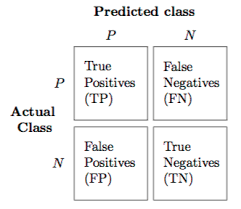

Text(50.722222222222214, 0.5, 'Actual')

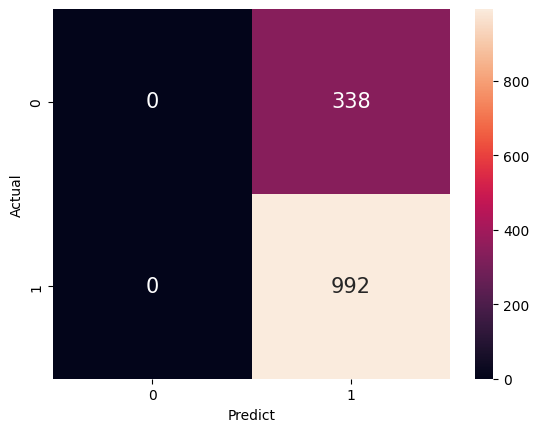

In [233]:
cm_dm = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

## ROC Curve
A graph showing the performance of an ambiguous classifier, due to the decision threshold set for it. The curve is created by plotting the true positive rate (TPR) against the false positive rate (FPR) under different acceptance thresholds.

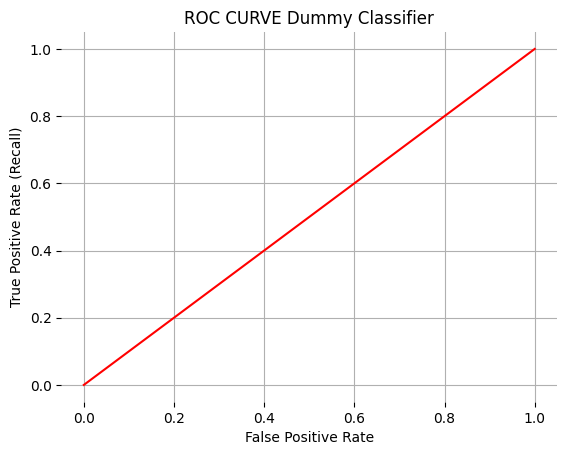

The score for the ROC Curve is: 50.0%


In [234]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='r')
plt.box(False)
plt.title('ROC CURVE Dummy Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dummy_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# KNN - K-Nearest Neighbors

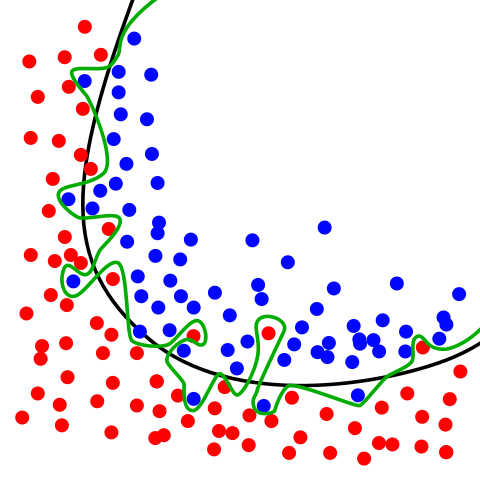

The output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors

In [235]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
knn

KNeighborsClassifier()

In [236]:
y_pred = knn.predict(X_test)

In [237]:
print (classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



In [238]:
#### Cross validation:

The goal of cross-validation is to test the model's ability to predict new data that was not used in estimating it, in order to flag problems like overfitting or selection bias and to give an insight on how the model will generalize to an independent dataset.

For illustration:

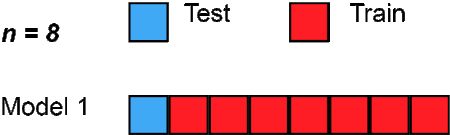

In [239]:
k_range = list(range(3,51)) # we will test k values in range 3-50
weight_op = ['uniform', 'distance'] # we will test the knn methods uniform & distance
d = {'n_neighbors' :k_range, 'weights': weight_op}

In [240]:
knn = KNeighborsClassifier(n_neighbors = 6, weights = 'distance')
knn.fit(X_train,y_train)
knn

KNeighborsClassifier(n_neighbors=6, weights='distance')

In [241]:
y_pred = knn.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [242]:
print (classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       338
           1       0.99      0.99      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.99      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(50.722222222222214, 0.5, 'Actual')

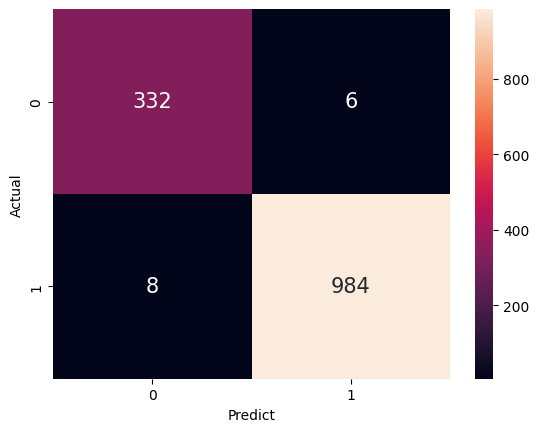

In [243]:
cm_knn = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_knn,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

### ROC Curve

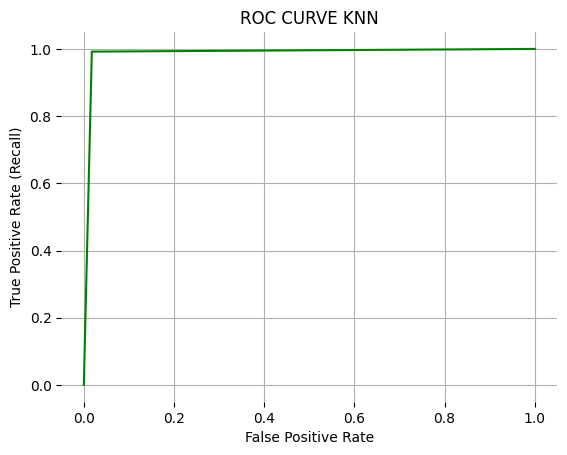

The score for the ROC Curve is: 98.7%


In [244]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='g')
plt.box(False)
plt.title('ROC CURVE KNN')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

knn_auc = round(auc,3)*100

print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

## Decision Tree

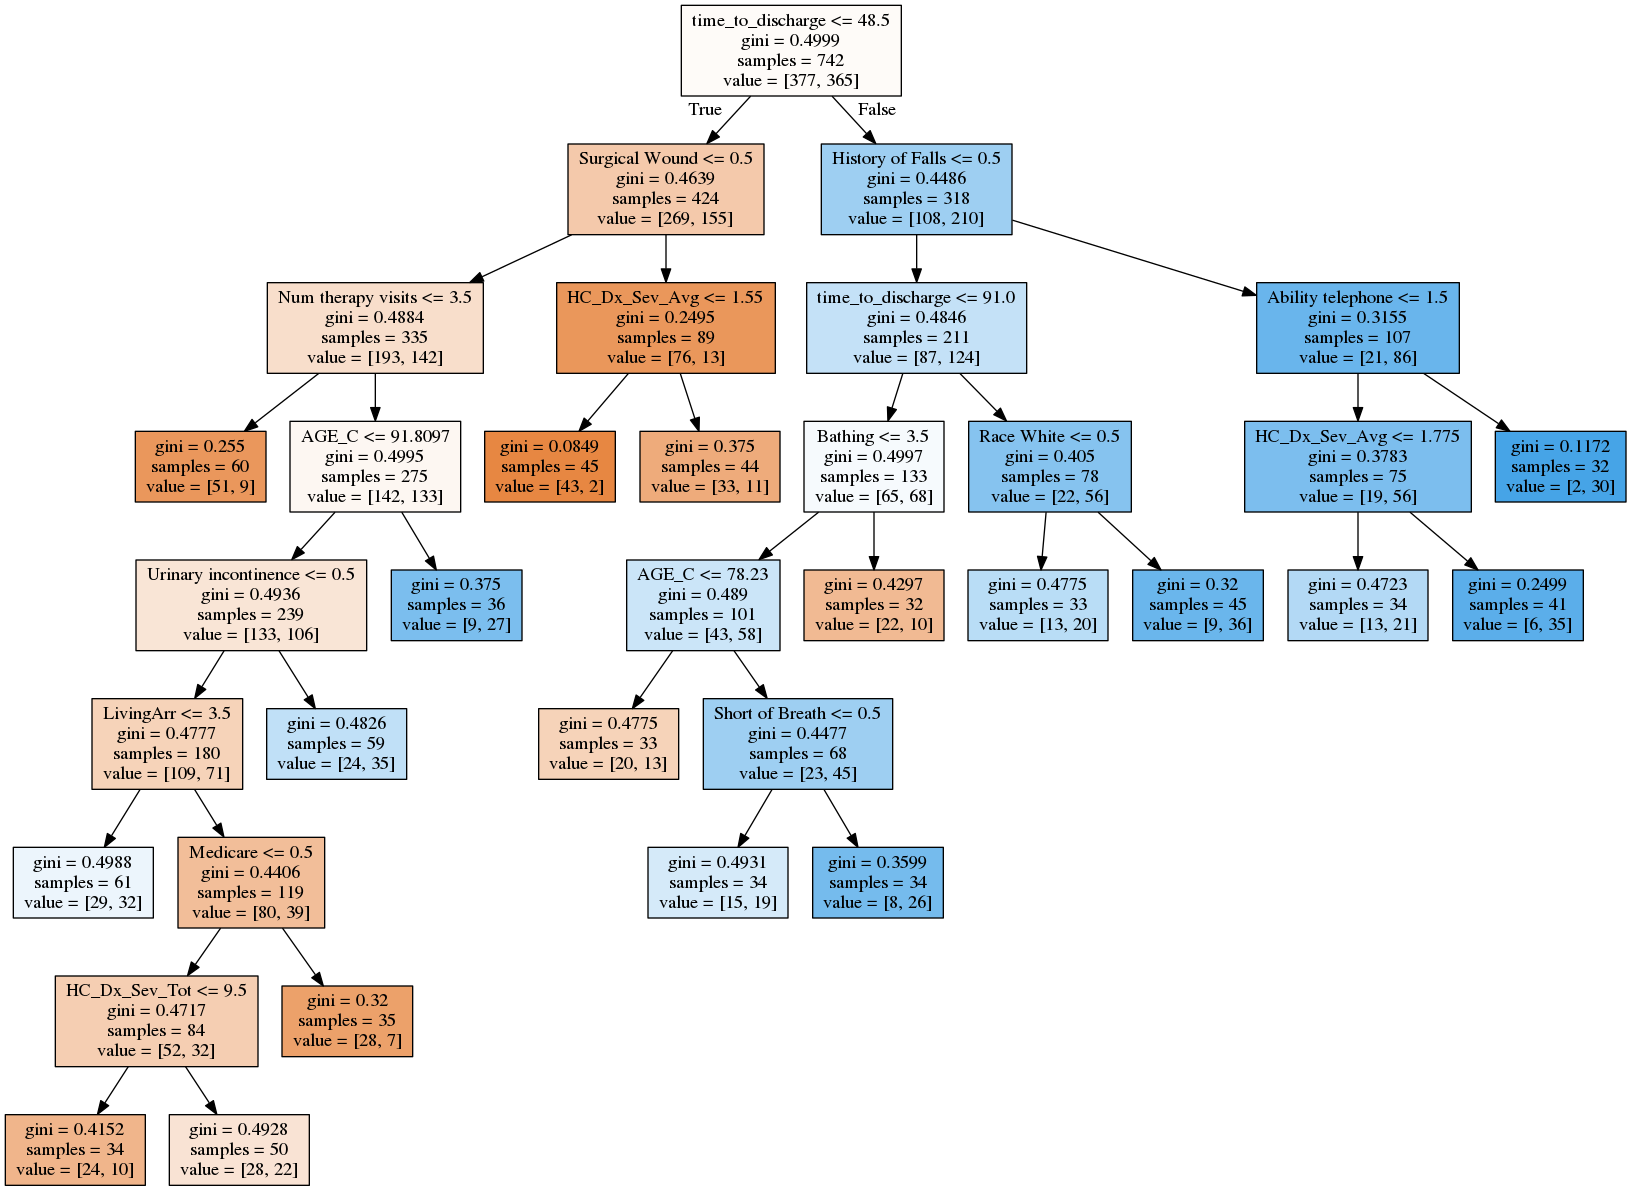

A decision tree is a decision support tool that uses a tree-like model of decisions and their possible consequences, including chance event outcomes, resource costs, and utility. Criterion is the function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain. Splitter is the strategy used to choose the split at each node. Supported strategies are “best” to choose the best split and “random” to choose the best random split.

In [245]:
dct = DecisionTreeClassifier(random_state=0) # gini and best are the default
dct = dct.fit(X_train,y_train)
dct

DecisionTreeClassifier(random_state=0)

In [246]:
y_pred = dct.predict(X_test)

In [247]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.99       992

    accuracy                           0.98      1330
   macro avg       0.97      0.98      0.97      1330
weighted avg       0.98      0.98      0.98      1330



α (alpha) is a tuning parameter that we finding using cross validation

In [248]:
path = dct.cost_complexity_pruning_path(X_train,y_train)
alphas = path.ccp_alphas
impurities = path.impurities
# it returns the effective alphas and the corresponding total leaf impurities at each step of the pruning process
alphas

array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
       2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
       3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
       4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
       4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
       7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
       9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
       1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
       1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
       6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
       2.39582664e-01])

In [249]:
d = {'ccp_alpha':alphas}
d

{'ccp_alpha': array([0.00000000e+00, 1.66949087e-04, 2.00030607e-04, 2.45712320e-04,
        2.48988484e-04, 2.49989650e-04, 2.99469756e-04, 3.31659497e-04,
        3.75939850e-04, 3.75939850e-04, 3.76689595e-04, 4.17710944e-04,
        4.51127820e-04, 4.76190476e-04, 4.91228070e-04, 4.94984391e-04,
        4.97567448e-04, 5.77918304e-04, 7.51879699e-04, 7.51879699e-04,
        7.51879699e-04, 8.35421888e-04, 9.29755582e-04, 9.66702470e-04,
        9.85018938e-04, 1.00250627e-03, 1.07910973e-03, 1.11546860e-03,
        1.15003342e-03, 1.46832836e-03, 1.58290463e-03, 1.92972212e-03,
        1.97833961e-03, 3.09516524e-03, 3.54018667e-03, 4.37447017e-03,
        6.70710472e-03, 1.64639731e-02, 2.96137992e-02, 4.18148968e-02,
        2.39582664e-01])}

Cross validation:

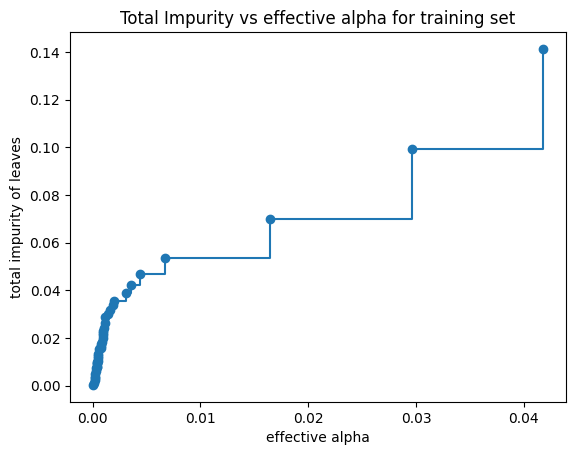

In [250]:
fig, ax = plt.subplots()
ax.plot(alphas[:-1], impurities[:-1], marker = 'o', drawstyle = "steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set");
#  as alpha increases, more of the tree is pruned, which increases the total impurity of its leaves

In [251]:
grid_dct = GridSearchCV(dct, d, cv=10, scoring='accuracy')
grid_dct.fit(data, target)
print("score:", grid_dct.best_score_, " params:", grid_dct.best_params_)

score: 0.9800751879699249  params: {'ccp_alpha': 0.0004761904761904761}


As we can see, the grid search found the optimal alpha for us. We will use that alpha to improve our model results

In [252]:
dct = DecisionTreeClassifier(ccp_alpha = 0.0004761904761904761)
dct = dct.fit(X_train, y_train)
dct

DecisionTreeClassifier(ccp_alpha=0.0004761904761904761)

In [253]:
y_pred = dct.predict(X_test)
y_pred

array([0, 0, 1, ..., 1, 1, 0])

In [254]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       338
           1       0.99      0.98      0.98       992

    accuracy                           0.98      1330
   macro avg       0.97      0.97      0.97      1330
weighted avg       0.98      0.98      0.98      1330



Text(50.722222222222214, 0.5, 'Actual')

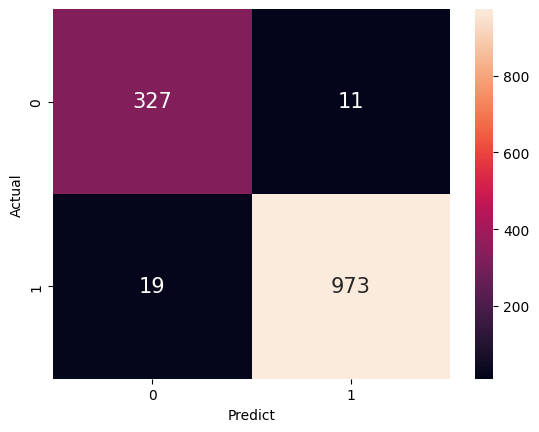

In [255]:
cm_dct = confusion_matrix(y_test,y_pred)
sns.heatmap(cm_dct,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

Let's take a look at the decision tree of our model:

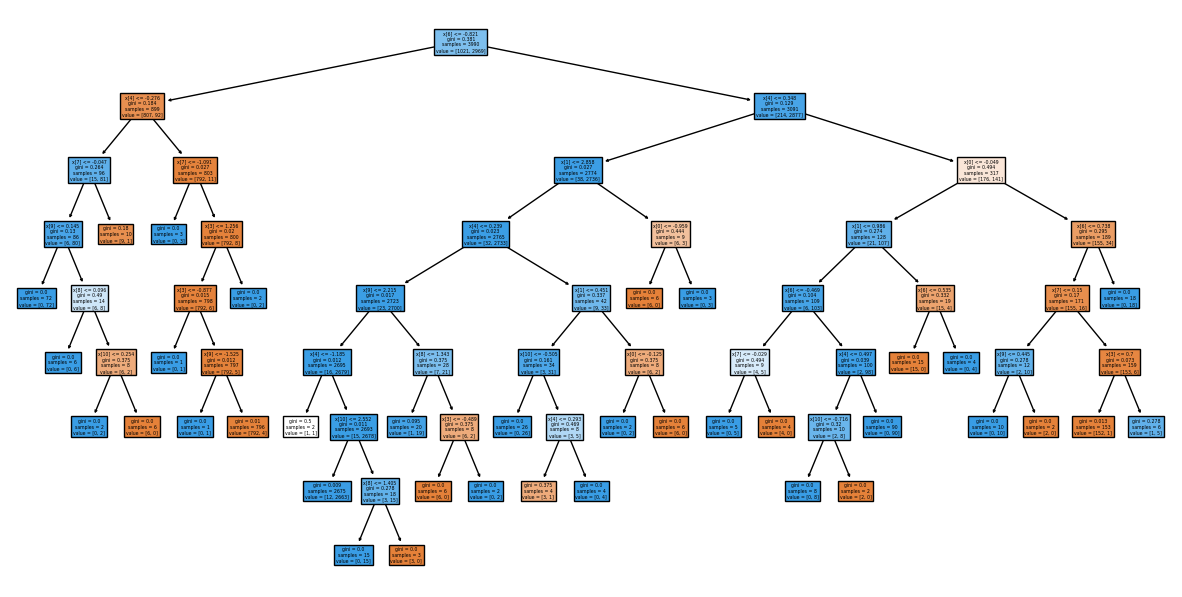

In [256]:
plt.figure(figsize=(15,7.5))
plot_tree(dct,filled=True);

### ROC Curve

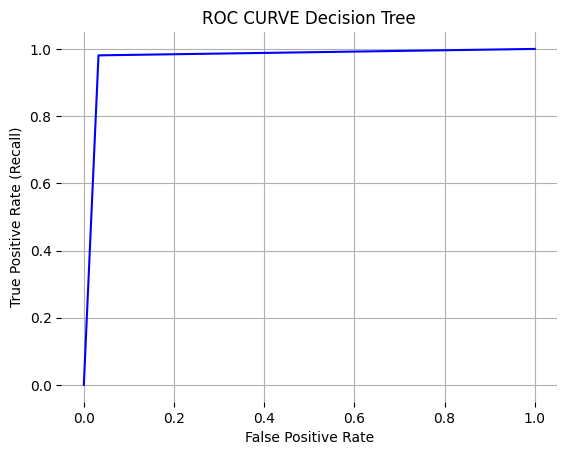

The score for the ROC Curve is: 97.39999999999999%


In [257]:
fpr, tpr, _= roc_curve(y_test, y_pred)
auc= roc_auc_score(y_test, y_pred)
plt.plot(fpr, tpr, label="auc="+str(auc), color='b')
plt.box(False)
plt.title('ROC CURVE Decision Tree')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

dct_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

### Logistic Regression

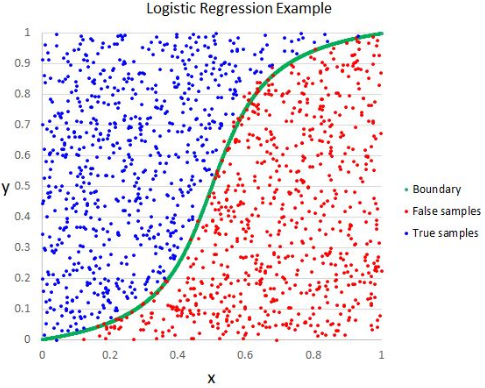

A statistical model that describes a possible relationship between a qualitative / categorical variable, known as the "explained variable", and other variables called "explanatory variables". The explanatory variables can be qualitative or quantitative. The model makes it possible to estimate the extent of the effect of a change in its value on each of the variables that explain the value of the explained variable. In other words, the model makes it possible to estimate correlations between the explanatory variables and the explained variable.

In [258]:
lr = LogisticRegression(random_state=0)
lr.fit(X_train, y_train)
predictions = lr.predict(X_test)

In [259]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98       338
           1       0.99      1.00      0.99       992

    accuracy                           0.99      1330
   macro avg       0.99      0.98      0.99      1330
weighted avg       0.99      0.99      0.99      1330



Text(50.722222222222214, 0.5, 'Actual')

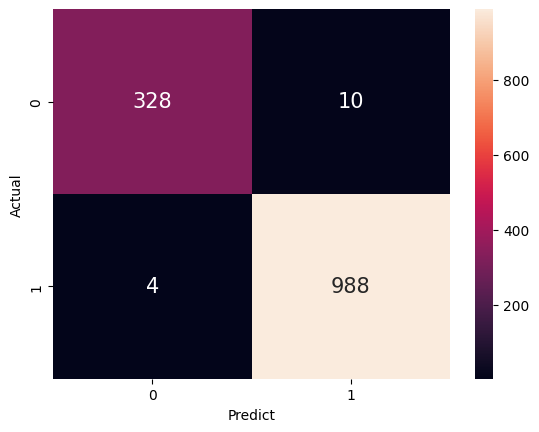

In [260]:
cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm,annot=True,annot_kws = {'size':15},fmt=".0f")
plt.xlabel("Predict")
plt.ylabel("Actual") #up and right = FP , down and right = FN

In [261]:
print(metrics.accuracy_score(y_test, predictions))

0.9894736842105263


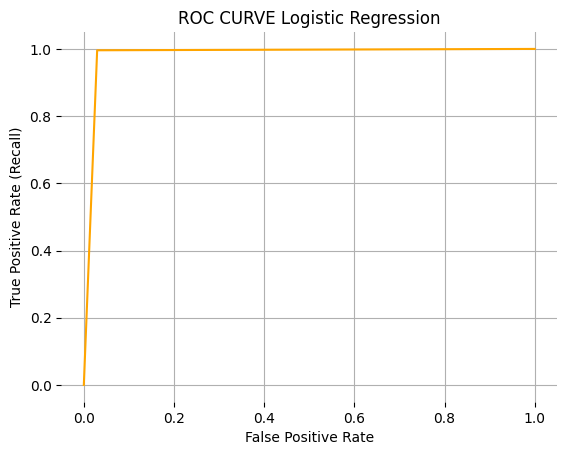

The score for the ROC Curve is: 98.3%


In [262]:
fpr, tpr, _= roc_curve(y_test, predictions)
auc= roc_auc_score(y_test, predictions)
plt.plot(fpr, tpr, label="auc="+str(auc), color='orange')
plt.box(False)
plt.title('ROC CURVE Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.grid(True)
plt.show()

lr_auc = round(auc,3)*100
 
print(f"The score for the ROC Curve is: {round(auc,3)*100}%")

# Conclusion/ВЫВОД

In [263]:
print("The score for the models:\n")
print("Dummy Classifer:      ",dummy_auc,"%")
print("KNN:                  ",knn_auc,"%")
print("Decision Tree:        ",dct_auc,"%")
print("Logistic Regression:  ",lr_auc,"%")

The score for the models:

Dummy Classifer:       50.0 %
KNN:                   98.7 %
Decision Tree:         97.39999999999999 %
Logistic Regression:   98.3 %


### With this results, we came to concluded that KNN is the most accurate model for our dataset, with 98.7 percentages of success.